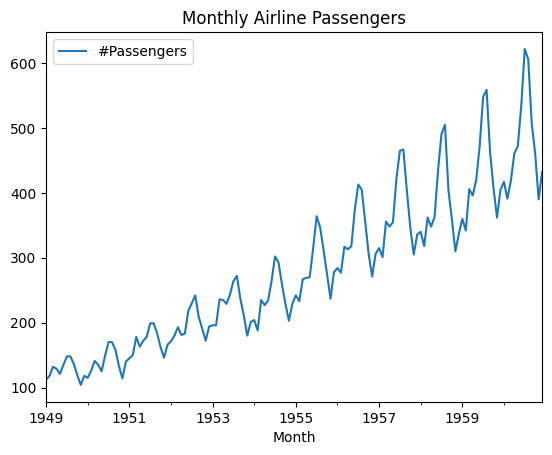

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

df.plot()
plt.title('Monthly Airline Passengers')
plt.show()


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the AirPassengers dataset
airline = pd.read_csv('AirPassengers.csv', index_col ='Month', parse_dates = True)
# Show first 10 rows of the data
airline.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


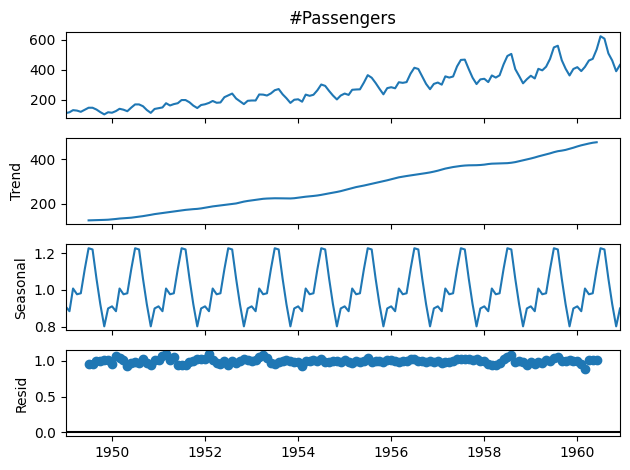

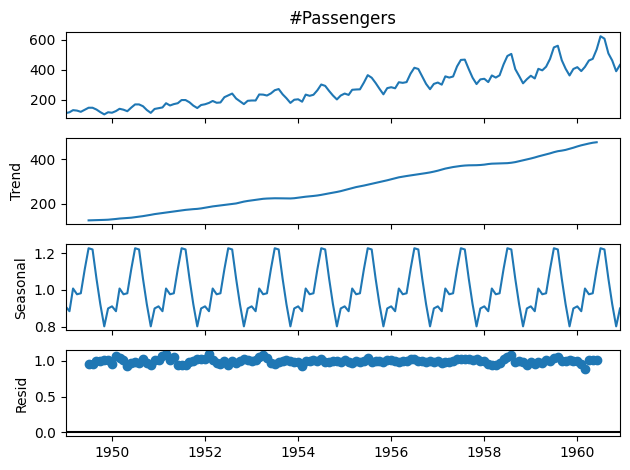

In [3]:
# ETS Decomposition
ets = seasonal_decompose(airline['#Passengers'], model ='multiplicative')
ets.plot()

In [10]:
from pmdarima import auto_arima
# Import the library
# Ignore harmless warnings
import warnings

warnings.filterwarnings("ignore")

airline = pd.read_csv('AirPassengers.csv')
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(airline['#Passengers'], start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12,
                            start_P = 0, seasonal = True,
                            d = None, D = 1, trace = True,
                            error_action ='ignore', # we don't want to know if an order does not work
                            suppress_warnings = True, # we don't want convergence warnings
                            stepwise = True) # set to stepwise
# To print the summarykd
stepwise_fit.summary()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [11]:
# Split data into train / test sets
train = airline.iloc[:len(airline)-12]
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['#Passengers'],
order = (0, 1, 1),
seasonal_order =(2, 1, 1, 12))
result = model.fit()
result.summary()

C:\Users\merle\PycharmProjects\Week6\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\merle\PycharmProjects\Week6\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.015
Date:                            Tue, 29 Oct 2024   AIC                            896.029
Time:                                    15:36:18   BIC                            909.925
Sample:                                01-01-1949   HQIC                           901.672
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2980      0.076     -3.942      0.000      -0.446      -0.150
ar.S.L12       0.7107      0.229      3.106      0.002       0.262       1.159
ar.S.L24       0.2883      0.100      2.878      0.004       0.092       0.485
ma.S.L12      -0.9788      2.045     -0.479      0.632      -4.987       3.029
sigma2        88.3206    162.312      0.544      0.586    -229.805     406.446
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.85   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\merle\PycharmProjects\Week6\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Month'>

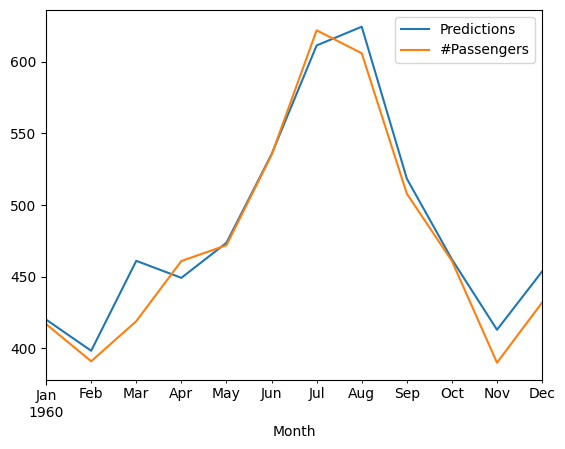

In [12]:
start = len(train)
end = len(train) + len(test) - 1
# Predictions for one-year against the test set
predictions = result.predict(start, end,
typ = 'levels').rename("Predictions")
# plot predictions and actual values
predictions.plot(legend = True)
test['#Passengers'].plot(legend = True)

In [13]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
# Calculate root mean squared error
print ("rmse = ",rmse(test["#Passengers"], predictions))
# Calculate mean squared error
print ("mse = ", mean_squared_error(test["#Passengers"], predictions))

rmse =  17.184001570282973
mse =  295.28990996748763


C:\Users\merle\PycharmProjects\Week6\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\merle\PycharmProjects\Week6\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\merle\PycharmProjects\Week6\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Month'>

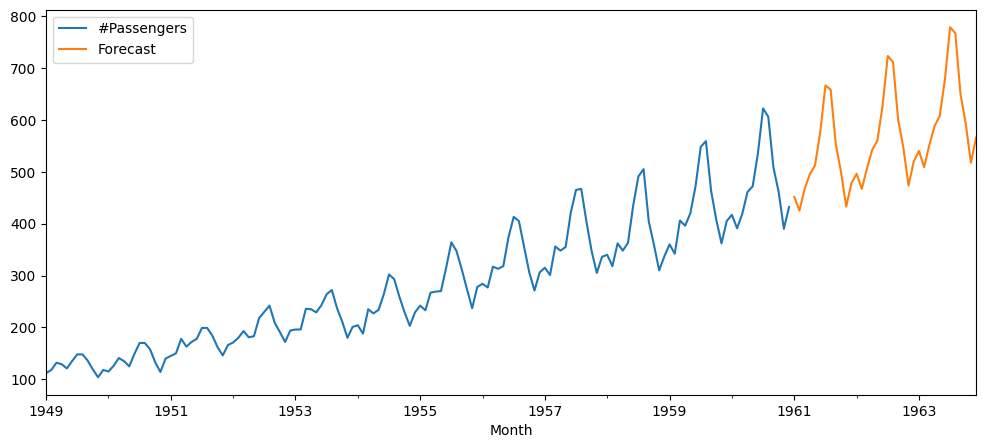

In [14]:
# Train the model on the full dataset
model = model = SARIMAX(airline['#Passengers'],
order = (0, 1, 1),
seasonal_order =(2, 1, 1, 12))
result = model.fit()
# Forecast for the next 3 years
forecast = result.predict(start = len(airline),
end = (len(airline)-1) + 3 * 12,
typ = 'levels').rename('Forecast')
# Plot the forecast values
airline['#Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

In [15]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
import pandas as pd
mydata = pd.read_csv('AirPassengers.csv', index_col = 'Month', parse_dates = True)
res = adfuller(mydata['#Passengers'])
print('Augmented Dickey-Fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])

Augmented Dickey-Fuller Statistic: 0.815369
p-value: 0.991880


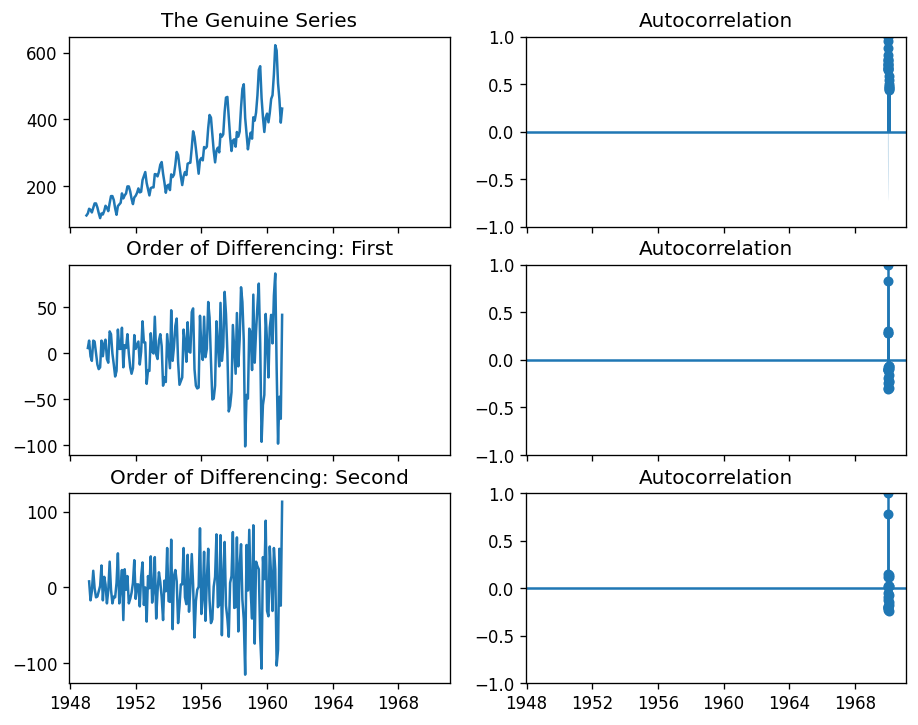

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize' : (9,7), 'figure.dpi' : 120})
# Importing data
df = pd.read_csv('AirPassengers.csv', index_col = 'Month', header = 0, parse_dates = True)
# The Genuine Series
fig, axes = plt.subplots(3, 2, sharex = True)
axes[0, 0].plot(df['#Passengers']); axes[0, 0].set_title('The Genuine Series')
plot_acf(df['#Passengers'], ax = axes[0, 1])
# Order of Differencing: First
axes[1, 0].plot(df['#Passengers'].diff()); axes[1, 0].set_title('Order of Differencing: First')
plot_acf(df['#Passengers'].diff().dropna(), ax = axes[1, 1])
# Order of Differencing: Second
axes[2, 0].plot(df['#Passengers'].diff().diff()); axes[2, 0].set_title('Order of Differencing: Second')
plot_acf(df['#Passengers'].diff().diff().dropna(), ax = axes[2, 1])
plt.show()

In [17]:
from pmdarima.arima.utils import ndiffs
X = df['#Passengers']
# Augmented Dickey Fuller Test
adftest = ndiffs(X, test = 'adf')
# KPSS Test
kpsstest = ndiffs(X, test = 'kpss')
# PP Test
pptest = ndiffs(X, test = 'pp')
print("ADF Test =", adftest)
print("KPSS Test =", kpsstest)
print("PP Test =", pptest)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

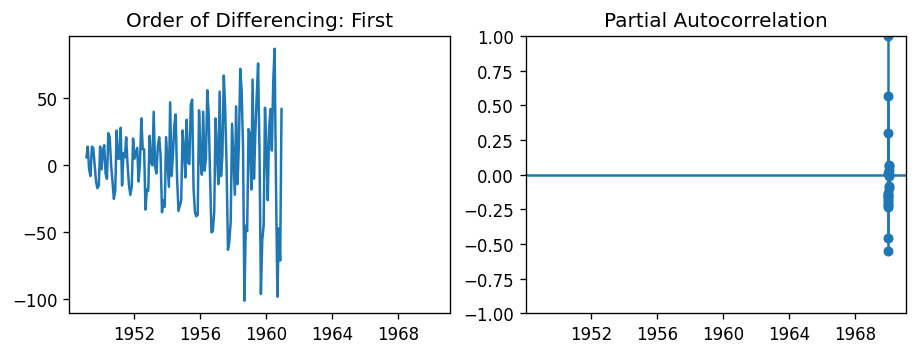

In [18]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex = True)
axes[0].plot(df['#Passengers'].diff()); axes[0].set_title('Order of Differencing: First')
axes[1].set(ylim = (0,5))
plot_pacf(df['#Passengers'].diff().dropna(), ax = axes[1])
plt.show()

In [19]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df['#Passengers'], order=(1,1,2))
result = model.fit()
print(result.summary())

C:\Users\merle\PycharmProjects\Week6\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\merle\PycharmProjects\Week6\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\merle\PycharmProjects\Week6\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -688.749
Date:                Tue, 29 Oct 2024   AIC                           1385.498
Time:                        15:40:47   BIC                           1397.349
Sample:                    01-01-1949   HQIC                          1390.313
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5724      0.097      5.928      0.000       0.383       0.762
ma.L1         -0.3126      0.098     -3.198      0.001      -0.504      -0.121
ma.L2         -0.5078      0.069     -7.412      0.0

C:\Users\merle\PycharmProjects\Week6\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\merle\PycharmProjects\Week6\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\merle\PycharmProjects\Week6\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


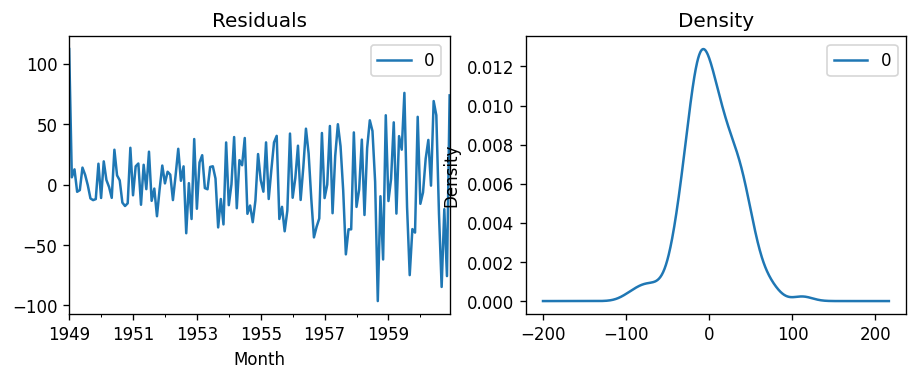

In [20]:
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120})
# Creating ARIMA model
mymodel = sm.tsa.arima.ARIMA(df['#Passengers'], order=(1,1,1))
modelfit = mymodel.fit()
# Plotting Residual Errors
myresiduals = pd.DataFrame(modelfit.resid)
fig, ax = plt.subplots(1,2)
myresiduals.plot(title = "Residuals", ax = ax[0])
myresiduals.plot(kind = 'kde', title = 'Density', ax = ax[1])
plt.show()